# Random forest

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [12]:
data=pd.read_csv(r"C:\Users\amana\Downloads\pima.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [6]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20)

In [9]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)
# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# predicting on the test set
y_pred = classifier.predict(X_test)

In [11]:
print(accuracy_score(y_test,y_pred))

0.7987012987012987


In [13]:
# check Important features
feature_importances_df = pd.DataFrame({"feature": list(X.columns), "importance": classifier.feature_importances_})

# Display
feature_importances_df

,feature,importance
3,SkinThickness,0.068524
4,Insulin,0.073903
0,Pregnancies,0.085403
2,BloodPressure,0.087649
6,DiabetesPedigreeFunction,0.121000
7,Age,0.137762
5,BMI,0.159252
1,Glucose,0.266507


In [16]:
x=data.drop(['Outcome','SkinThickness'],axis=1)
y=data['Outcome']

In [19]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y)

In [24]:
classifier.fit(x_tr,y_tr)
y_pred=classifier.predict(x_te)
print("accuracy: ", accuracy_score(y_te,y_pred))

accuracy:  0.7760416666666666


In [30]:
#comparison with decision tree

from sklearn.tree import DecisionTreeClassifier 
dt=DecisionTreeClassifier()
dt.fit(x_tr,y_tr)
y_pr=dt.predict(x_te)
print("accuracy: ",accuracy_score(y_te,y_pr))

accuracy:  0.703125


# SVM

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV # Import train_test_split function
from sklearn.svm import SVC #Import svm model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [32]:
data=pd.read_csv(r"C:\Users\amana\Downloads\glass.csv")
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [35]:
x = data.drop('Type',axis = 1) 
y = data['Type']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [52]:
model1=SVC(kernel='sigmoid',gamma=0.001)
model2=SVC(kernel='poly',degree=3)
model3=SVC(kernel='rbf')

In [61]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

SVC()

In [62]:
ypred1=model1.predict(x_test)
ypred2=model2.predict(x_test)
ypred3=model3.predict(x_test)

In [63]:
print(accuracy_score(y_test,ypred1))
print(accuracy_score(y_test,ypred2))
print(accuracy_score(y_test,ypred3))

0.3384615384615385
0.8923076923076924
0.7230769230769231


# Naive BAYES 

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,roc_curve
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r"C:\Users\amana\Downloads\covid.csv")

In [66]:
le = preprocessing.LabelEncoder()
pc = le.fit_transform(data['pc'].values)
wbc = le.fit_transform(data['wbc'].values)
mc = le.fit_transform(data['mc'].values)
ast = le.fit_transform(data['ast'].values)
bc = le.fit_transform(data['bc'].values)
ldh = le.fit_transform(data['ldh'].values)
y = le.fit_transform(data['diagnosis'].values)
X = np.array(list(zip(pc, wbc, mc, ast, bc, ldh)))

In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
naivee = MultinomialNB()
naivee.fit(xtrain, ytrain)
ypred = naivee.predict(xtest)
print("Accuracy: ", accuracy_score(ytest, ypred))
print("Classification Report: \n", classification_report(ytest, ypred))

Accuracy:  0.7142857142857143
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.80      0.80      0.80         5

    accuracy                           0.71         7
   macro avg       0.65      0.65      0.65         7
weighted avg       0.71      0.71      0.71         7



In [69]:
lr_probs = naivee.predict_proba(xtest)[:,1]
lr_fpr, lr_tpr, _=roc_curve(ytest, lr_probs)

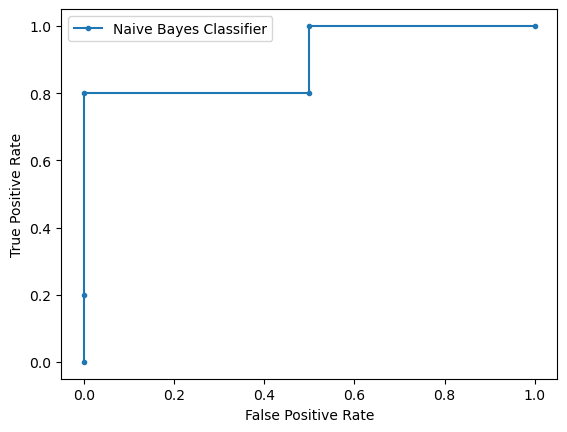

In [74]:
from matplotlib import pyplot
pyplot.plot(lr_fpr, lr_tpr,label='Naive Bayes Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()